# Looking at genre popularity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### MOVIE DATABASES ###

# Box Office Mojo by IMDb Pro
movie_gross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

# IMDb
imdb_name_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_akas_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
imdb_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_principals_df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
imdb_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

# Rotten Tomatos
rt_movies_df = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

# The Movie Database
tmdb_movies_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

# The Numbers
tn_budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

### Joining imdb_title_basics_df and imdb_ratings_df

The goal here is to see which movie genres performed well based on their average rating.

In [3]:
imdb_basics_rating_df = pd.merge(left=imdb_basics_df,right=imdb_ratings_df,
                               on='tconst',how='inner')

In [4]:
imdb_basics_rating_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [5]:
imdb_basics_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


We can see that the runtime_minutes and genres column have missing values that need to be addressed. Lets start by looking into the runtime_minutes columns.

### Addressing runtime_minutes column

In [6]:
imdb_basics_rating_df['runtime_minutes'].value_counts()

90.0     4742
80.0     2166
85.0     2057
100.0    1957
95.0     1933
         ... 
212.0       1
278.0       1
225.0       1
467.0       1
746.0       1
Name: runtime_minutes, Length: 289, dtype: int64

In [7]:
imdb_basics_rating_df['runtime_minutes'].describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

runtime_minutes has a max of 51420 minutes which is very long for a movie. There are also other values for runtime which are too high. The best course of action would be to replace those unusually high runtime_minutes value and the missing values with the mean or median of the column. We will limit runtime_minutes to not exceed 150.

In [8]:
imdb_basics_rating_df_copy = imdb_basics_rating_df.copy()
minutes = imdb_basics_rating_df_copy['runtime_minutes']
minutes[minutes>150] = minutes.mean()

<ipython-input-8-65ce976b6901>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes[minutes>150] = minutes.mean()


Replacing runtime_minutes greater than 150 with the mean.

In [9]:
imdb_basics_rating_df_copy.loc[minutes>150,'runtime_minutes'] = minutes.mean() 

Replacing runtime_minutes that have missing values with the mean.

In [10]:
imdb_basics_rating_df_copy.loc[minutes.isna()==True,'runtime_minutes'] = minutes.mean()

Check

In [11]:
minutes.describe()

count    73856.000000
mean        91.969363
std         18.825770
min          3.000000
25%         83.000000
50%         91.969363
75%        100.000000
max        150.000000
Name: runtime_minutes, dtype: float64

In [12]:
imdb_basics_rating_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


### Addressing ratings column

In [13]:
imdb_basics_rating_df_copy['averagerating'].describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [14]:
imdb_basics_rating_df_copy['averagerating'].count()
#no missing data

73856

The ratings columns looks good.

### Looking for more missing data

In [15]:
imdb_basics_rating_df_copy['genres'].isna().sum()

804

The genres column has 804 missing columns. Since we are unable to replace the missing value with the most common movie genre since we may be inputting the wrong data by doing so, we will drop those rows. This should be fine since we don't lose a signifficant amount of rows.

In [16]:
imdb_basics_rating_df_copy = imdb_basics_rating_df_copy[imdb_basics_rating_df_copy['genres'].isna() != True] 

In [17]:
imdb_basics_rating_df_copy.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

Our joint dataframe of interest has no more missing data.

### Checking for duplicates

In [18]:
imdb_basics_rating_df_copy.duplicated().sum()

0

Fortunately we do not have duplicates.

In [19]:
imdb_basics_rating_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


### Genres column

In [47]:
imdb_basics_rating_df_copy['genres'] = imdb_basics_rating_df_copy['genres'].str.replace(',','/')

In [48]:
imdb_basics_rating_df_copy.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,94.654040,Action/Crime/Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,Biography/Drama,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.969363,Comedy/Drama,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,Comedy/Drama/Fantasy,6.5,119


### Looking for the 10 most common movie genres that are rated above an 8 from IMDB 
We want to start by getting the movies that were rated at least an 8.

In [49]:
ratings_over_8 = imdb_basics_rating_df_copy[imdb_basics_rating_df_copy['averagerating'] >= 8]

Since each movie sometimes falls into multiple movie genres, we will create a genre dictionary that will keep track of each individual genre's occurence. This will give us a sense of the general movie genres that are were rated above an 8.

In [50]:
genres = ratings_over_8['genres']

In [51]:
genres = list(genres.unique())

In [52]:
x = []

for genre in genres:
    x.append(genre.split('/'))
    
genres_freq = {}

for lists in x:
    for genre in lists:
        if genre in genres_freq:
            genres_freq[genre] += 1
        else:
            genres_freq[genre] = 1

In [53]:
popular_genres = pd.Series(genres_freq)

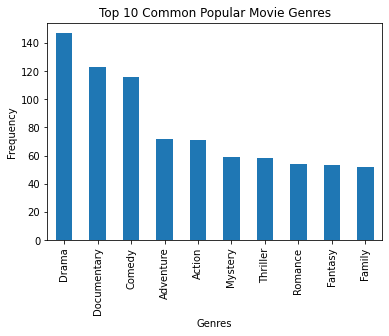

In [54]:
popular_genres.sort_values(ascending=False)[:10].plot.bar()
plt.title('Top 10 Common Popular Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.show();